# Exploratory Data Analysis Notebook

### Summary

This notebook chronicles the data exploration I have undertaken to analyze and choose the features I will be using for my classification of accident severity.

I have choosen to used the most represented (those with the least null values ) columns in the dataset  for my analysis. These columns had a near universal presence in all rows. This observation leads me to believe their consistant inclusion shows there predictive qualities. 

My feature selection can be seen below


In [1]:
import pandas as pd

In [2]:
import numpy as np

## Loading and Sampling the Data

In [4]:
accident_df = pd.read_csv('./Data-Collisions.csv' )

/home/pasberry/anaconda3/envs/coursera_pyspark/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
accident_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

## Checking the Consistancy of the Data

As we can see, a few of the columns have null or missing data

In [7]:
accident_df.isnull().any()

SEVERITYCODE      False
X                  True
Y                  True
OBJECTID          False
INCKEY            False
COLDETKEY         False
REPORTNO          False
STATUS            False
ADDRTYPE           True
INTKEY             True
LOCATION           True
EXCEPTRSNCODE      True
EXCEPTRSNDESC      True
SEVERITYCODE.1    False
SEVERITYDESC      False
COLLISIONTYPE      True
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE       True
SDOT_COLCODE      False
SDOT_COLDESC      False
INATTENTIONIND     True
UNDERINFL          True
WEATHER            True
ROADCOND           True
LIGHTCOND          True
PEDROWNOTGRNT      True
SDOTCOLNUM         True
SPEEDING           True
ST_COLCODE         True
ST_COLDESC         True
SEGLANEKEY        False
CROSSWALKKEY      False
HITPARKEDCAR      False
dtype: bool

In [8]:
accident_df.isnull().sum()


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Below are the total number of records available for each data point

In [8]:
accident_df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [13]:
len(accident_df.index)

194673

Simple correlation performed on the dataframe

In [7]:
accident_df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


## Sample the Data From Potential Features

As we can see below, the Severity of the accident is broken into two classes, with 130000+ positve and 50000+ negatives



In [6]:
accident_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

<br>
<br>


**In addition to sampling the 'Severity' column, below other samplings can be observed**


<br>

In [9]:
accident_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [10]:
accident_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [11]:
accident_df['INCDATE'].value_counts()

2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    92
2005/05/18 00:00:00+00    84
2005/11/05 00:00:00+00    83
2006/01/13 00:00:00+00    83
                          ..
2020/05/18 00:00:00+00     2
2020/05/20 00:00:00+00     1
2015/12/25 00:00:00+00     1
2020/05/17 00:00:00+00     1
2020/05/19 00:00:00+00     1
Name: INCDATE, Length: 5985, dtype: int64

In [12]:
accident_df['INCDTTM'].value_counts()

11/2/2006                96
10/3/2008                91
11/5/2005                83
12/4/2004                74
6/1/2006                 73
                         ..
11/26/2010 6:36:00 PM     1
9/25/2014 7:45:00 PM      1
7/10/2010 7:53:00 PM      1
5/21/2004 12:48:00 AM     1
3/28/2017 1:42:00 PM      1
Name: INCDTTM, Length: 162058, dtype: int64

In [13]:
accident_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [14]:
accident_df['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [15]:
accident_df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [16]:
accident_df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [17]:
accident_df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [18]:
accident_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [19]:
accident_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
accident_df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [21]:
accident_df['SDOTCOLNUM'].value_counts()

4116034.0     2
11200007.0    2
4112025.0     2
4116048.0     2
5036003.0     1
             ..
6262043.0     1
6162018.0     1
6277003.0     1
8267022.0     1
5071015.0     1
Name: SDOTCOLNUM, Length: 114932, dtype: int64

In [22]:
accident_df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [23]:
accident_df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
49        1
43        1
54        1
43        1
87        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [24]:
accident_df['ST_COLDESC'].value_counts()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Vehicle Strikes All Other Non-Domestic Animal                              2
Railway Vehicle Strikes Pedalcyclist                                       2
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Hits State Road or Construction Machinery                          1
Vehicle Strikes Deer                                                       1
Name: ST_COLDESC, Length: 62, dtype: int64

In [25]:
accident_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [26]:
len(accident_df['ADDRTYPE'])

194673

In [27]:
accident_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [28]:
accident_df['EXCEPTRSNDESC'].value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

In [29]:
accident_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [30]:
accident_df['X'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

In [31]:
accident_df['Y'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

In [32]:
incident_df = accident_df[['INCDATE']]
incident_df

,INCDATE
0,2013/03/27 00:00:00+00
1,2006/12/20 00:00:00+00
2,2004/11/18 00:00:00+00
3,2013/03/29 00:00:00+00
4,2004/01/28 00:00:00+00
...,...
194668,2018/11/12 00:00:00+00
194669,2018/12/18 00:00:00+00
194670,2019/01/19 00:00:00+00
194671,2019/01/15 00:00:00+00


In [33]:
incident_df['INCDATE'][0].split()[0].replace('/', '-')

'2013-03-27'

In [34]:
x = incident_df['INCDATE'].apply(lambda row : row.split()[0].replace('/', '-'))
x

0         2013-03-27
1         2006-12-20
2         2004-11-18
3         2013-03-29
4         2004-01-28
             ...    
194668    2018-11-12
194669    2018-12-18
194670    2019-01-19
194671    2019-01-15
194672    2018-11-30
Name: INCDATE, Length: 194673, dtype: object

## Transforming the Data to Build the Feature Set

In [35]:
from datetime import date

In [84]:
def get_accident_month(row):
    '''
        This function will take the month from the INCDATE column of the dataset.
    '''
    date_iso_format = row.split()[0].replace('/', '-')
    date_val = date.fromisoformat(date_iso_format)
    
    if date_val.month == 1:
        return 'January'
    elif date_val.month == 2:
        return 'Feburary'
    elif date_val.month == 3:
        return 'March'
    elif date_val.month == 4:
        return 'April'
    elif date_val.month == 5:
        return 'May'
    elif date_val.month == 6:
        return 'June'
    elif date_val.month == 7:
        return 'July'
    elif date_val.month == 8:
        return 'August'
    elif date_val.month == 9:
        return 'September'
    elif date_val.month == 10:
        return 'October'
    elif date_val.month == 11:
        return 'November'
    elif date_val.month == 12:
        return 'December'
    
    return date_val.month

In [85]:
months = incident_df['INCDATE'].apply(lambda row : get_accident_month(row))
months

0            March
1         December
2         November
3            March
4          January
            ...   
194668    November
194669    December
194670     January
194671     January
194672    November
Name: INCDATE, Length: 194673, dtype: object

In [83]:
s = date.fromisoformat(incident_df['INCDATE'][0].split()[0].replace('/', '-'))

In [84]:
s

datetime.date(2013, 3, 27)

In [85]:
s.month

3

In [86]:
def get_accident_day_of_week(row):
    '''
        This function will take the day of the week from the INCDATE column of the dataset.
    '''
    date_iso_format = row.split()[0].replace('/', '-')
    date_val = date.fromisoformat(date_iso_format)
    
    if date_val.weekday() == 0:
        return 'Monday'
    elif date_val.weekday() == 1:
        return 'Tuesday'
    elif date_val.weekday() == 2:
        return 'Wednesday'
    elif date_val.weekday() == 3:
        return 'Thursday'
    elif date_val.weekday() == 4:
        return 'Friday'
    elif date_val.weekday() == 5:
        return 'Saturday'
    elif date_val.weekday() == 6:
        return 'Sunday'
    
    return date_val.weekday()

In [87]:
days_of_week = incident_df['INCDATE'].apply(lambda row : get_accident_day_of_week(row))

In [88]:
days_of_week

0         Wednesday
1         Wednesday
2          Thursday
3            Friday
4         Wednesday
            ...    
194668       Monday
194669      Tuesday
194670     Saturday
194671      Tuesday
194672       Friday
Name: INCDATE, Length: 194673, dtype: object

In [124]:
 accident_df['ROADCOND'][0] 

'k'

In [41]:
def change_road_condition_categories(row):
    
    '''
        This function will recategorize the road conditions into two categories, Fair and Hazardous
    '''
        
    HAZARD_CONDITION = 'Hazardous'
    FAIR_CONDITION = 'Fair'
    
    if row == 'Dry':
        return FAIR_CONDITION
    elif row == 'Wet' or row == 'Snow/Slush' or row == 'Ice' or row == 'Standing Water'or row == 'Sand/Mud/Dirt' or row == 'Oil':
        return HAZARD_CONDITION
    else :
        return FAIR_CONDITION

In [42]:
road_condition = accident_df['ROADCOND'].apply(lambda row : change_road_condition_categories(row))

In [43]:
road_condition

0         Hazardous
1         Hazardous
2              Fair
3              Fair
4         Hazardous
            ...    
194668         Fair
194669    Hazardous
194670         Fair
194671         Fair
194672    Hazardous
Name: ROADCOND, Length: 194673, dtype: object

In [44]:
def change_weather_condition_categories(row):
    '''
        This function will recategorize the weather conditions into two categories, Clear and Inclement
    '''
    
    CLEAR_CONDITION = 'Clear'
    INCLEMENT_CONDITION = 'Inclement'
    
    if row == 'Clear' or row == 'Overcast' or row == 'Unknown' or row == 'Other' or row == 'Partly Cloudy' :
        return CLEAR_CONDITION
    elif row == 'Raining' or row == 'Snowing' or row == 'Fog/Smog/Smoke' or row == 'Sleet/Hail/Freezing Rain' or row == 'Blowing Sand/Dirt' or row == 'Severe Crosswind' :
        return INCLEMENT_CONDITION
    else:
        return CLEAR_CONDITION
    
    

In [45]:
weather_condition = accident_df['WEATHER'].apply(lambda row : change_weather_condition_categories(row))
weather_condition

0             Clear
1         Inclement
2             Clear
3             Clear
4         Inclement
            ...    
194668        Clear
194669    Inclement
194670        Clear
194671        Clear
194672        Clear
Name: WEATHER, Length: 194673, dtype: object

In [46]:
weather_condition[weather_condition != 'Clear'].shape

(34815,)

In [47]:
def change_lighting_condition_categories(row):
    '''
        This function will recategorize the lighting condition into two categories. Night and Day
    '''
    
    DAY_HOURS = 'Day'
    NIGHT_HOURS = 'Night'
    
    if row == 'Daylight' or row == 'Unknown' or row == 'Dusk' or row == 'Dawn' or row == 'Other' :
        return DAY_HOURS
    elif row == 'Dark - Street Lights On' or row == 'Dark - No Street Lights' or row == 'Dark - Street Lights Off' or row == 'Dark - Unknown Lighting' :
        return NIGHT_HOURS
    else:
        return DAY_HOURS




In [48]:
lighting_condition = accident_df['LIGHTCOND'].apply(lambda row : change_lighting_condition_categories(row))
lighting_condition

0           Day
1         Night
2           Day
3           Day
4           Day
          ...  
194668      Day
194669      Day
194670      Day
194671      Day
194672      Day
Name: LIGHTCOND, Length: 194673, dtype: object

In [49]:
lighting_condition[lighting_condition == 'Day'].to_numpy().shape

(143419,)

In [50]:
def change_under_the_influence_categories(row):
    ''' 
        This function will combine categories 0 and N into a No category and Y and 1 into a Yes category
    '''
    
    NO = "No"
    YES = "Yes"
    
    if row == 'N' or row == '0' :
        return NO
    elif row == 'Y' or row == '1' :
        return YES
    else:
        return NO

In [51]:
under_the_influence = accident_df['UNDERINFL'].apply(lambda row : change_under_the_influence_categories(row))

In [52]:
under_the_influence[under_the_influence == 'No'].to_numpy().shape

(185552,)

In [230]:
accident_df['VEHCOUNT'].max()

12

In [231]:
accident_df['VEHCOUNT'].min()


0

In [232]:
accident_df['VEHCOUNT'].mean()

1.9207799746241132

In [53]:
vehicle_count = (accident_df['VEHCOUNT'] - accident_df['VEHCOUNT'].min() ) / (accident_df['VEHCOUNT'].max() - accident_df['VEHCOUNT'].min())

In [54]:
person_count = (accident_df['PERSONCOUNT'] - accident_df['PERSONCOUNT'].min() ) / (accident_df['PERSONCOUNT'].max() - accident_df['PERSONCOUNT'].min())

In [55]:
pedestrian_count = (accident_df['PEDCOUNT'] - accident_df['PEDCOUNT'].min() ) / (accident_df['PEDCOUNT'].max() - accident_df['PEDCOUNT'].min())

In [56]:
cyclist_count = (accident_df['PEDCYLCOUNT'] - accident_df['PEDCYLCOUNT'].min() ) / (accident_df['PEDCYLCOUNT'].max() - accident_df['PEDCYLCOUNT'].min())

In [57]:
accident_location = accident_df['ADDRTYPE'].fillna('Block')

In [58]:
X_scaled = (accident_df['X'] - accident_df['X'].min()) / (accident_df['X'].max() -  accident_df['X'].min() )

In [59]:
X_scaled

0         0.532596
1         0.398557
2         0.469359
3         0.467897
4         0.625423
            ...   
194668    0.712022
194669    0.413924
194670    0.623967
194671    0.354024
194672    0.720163
Name: X, Length: 194673, dtype: float64

In [60]:
Y_scaled = (accident_df['Y'] - accident_df['Y'].min()) / (accident_df['Y'].max() -  accident_df['Y'].min() )

In [61]:
Y_scaled

0         0.870053
1         0.635455
2         0.470718
3         0.457855
4         0.210281
            ...   
194668    0.292726
194669    0.818844
194670    0.785828
194671    0.767751
194672    0.483903
Name: Y, Length: 194673, dtype: float64

In [89]:
unscaled_features = {'X' : accident_df['X'], 'Y' : accident_df['Y'], 'Incident Month' : months, 'Incident Day of Week' : days_of_week, 'Road Condition' : road_condition, 'Weather' : weather_condition, 'Time of Day' : lighting_condition, 'Drunk Driving Incident': under_the_influence, 'Vehicles Involved': accident_df['VEHCOUNT'] , 'Persons Involved': accident_df['PERSONCOUNT'] , "Accident Location": accident_location}

In [90]:
features = {'X' : X_scaled, 'Y' : Y_scaled, 'Incident Month' : months, 'Incident Day of Week' : days_of_week, 'Road Condition' : road_condition, 'Weather' : weather_condition, 'Time of Day' : lighting_condition, 'Drunk Driving Incident': under_the_influence, 'Vehicles Involved': vehicle_count , 'Persons Involved': person_count , "Accident Location": accident_location}

<br>
<br>

## Building the Feature Set Dataframe

Here is the dataframe containing the selected features used in our classification algorithms

In [91]:
unscaled_features_df = pd.DataFrame(unscaled_features)

In [92]:
unscaled_features_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Accident Location
0,-122.323148,47.703140,March,Wednesday,Hazardous,Clear,Day,No,2,2,Intersection
1,-122.347294,47.647172,December,Wednesday,Hazardous,Inclement,Night,No,2,2,Block
2,-122.334540,47.607871,November,Thursday,Fair,Clear,Day,No,3,4,Block
3,-122.334803,47.604803,March,Friday,Fair,Clear,Day,No,3,3,Block
4,-122.306426,47.545739,January,Wednesday,Hazardous,Inclement,Day,No,2,2,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,November,Monday,Fair,Clear,Day,No,2,3,Block
194669,-122.344526,47.690924,December,Tuesday,Hazardous,Inclement,Day,No,2,2,Block
194670,-122.306689,47.683047,January,Saturday,Fair,Clear,Day,No,2,3,Intersection
194671,-122.355317,47.678734,January,Tuesday,Fair,Clear,Day,No,1,2,Intersection


The below dataframe represents the data with all numerical data **Min/Max Normalized**

In [93]:
features_df = pd.DataFrame(features)

In [94]:
features_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Accident Location
0,0.532596,0.870053,March,Wednesday,Hazardous,Clear,Day,No,0.166667,0.024691,Intersection
1,0.398557,0.635455,December,Wednesday,Hazardous,Inclement,Night,No,0.166667,0.024691,Block
2,0.469359,0.470718,November,Thursday,Fair,Clear,Day,No,0.250000,0.049383,Block
3,0.467897,0.457855,March,Friday,Fair,Clear,Day,No,0.250000,0.037037,Block
4,0.625423,0.210281,January,Wednesday,Hazardous,Inclement,Day,No,0.166667,0.024691,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Fair,Clear,Day,No,0.166667,0.037037,Block
194669,0.413924,0.818844,December,Tuesday,Hazardous,Inclement,Day,No,0.166667,0.024691,Block
194670,0.623967,0.785828,January,Saturday,Fair,Clear,Day,No,0.166667,0.037037,Intersection
194671,0.354024,0.767751,January,Tuesday,Fair,Clear,Day,No,0.083333,0.024691,Intersection


<br>

Now we will **One Hot Encode** all of the categorical fields of the `features_df`

In [95]:
features_vectorized_df = pd.concat ([features_df , pd.get_dummies(features_df['Road Condition'], prefix='road_condition')] , axis = 1)

In [96]:
features_vectorized_df

,X,Y,Incident Month,Incident Day of Week,Road Condition,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Accident Location,road_condition_Fair,road_condition_Hazardous
0,0.532596,0.870053,March,Wednesday,Hazardous,Clear,Day,No,0.166667,0.024691,Intersection,0,1
1,0.398557,0.635455,December,Wednesday,Hazardous,Inclement,Night,No,0.166667,0.024691,Block,0,1
2,0.469359,0.470718,November,Thursday,Fair,Clear,Day,No,0.250000,0.049383,Block,1,0
3,0.467897,0.457855,March,Friday,Fair,Clear,Day,No,0.250000,0.037037,Block,1,0
4,0.625423,0.210281,January,Wednesday,Hazardous,Inclement,Day,No,0.166667,0.024691,Intersection,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Fair,Clear,Day,No,0.166667,0.037037,Block,1,0
194669,0.413924,0.818844,December,Tuesday,Hazardous,Inclement,Day,No,0.166667,0.024691,Block,0,1
194670,0.623967,0.785828,January,Saturday,Fair,Clear,Day,No,0.166667,0.037037,Intersection,1,0
194671,0.354024,0.767751,January,Tuesday,Fair,Clear,Day,No,0.083333,0.024691,Intersection,1,0


In [97]:
features_vectorized_df = features_vectorized_df.drop(['Road Condition'], axis=1)

In [98]:
features_vectorized_df

,X,Y,Incident Month,Incident Day of Week,Weather,Time of Day,Drunk Driving Incident,Vehicles Involved,Persons Involved,Accident Location,road_condition_Fair,road_condition_Hazardous
0,0.532596,0.870053,March,Wednesday,Clear,Day,No,0.166667,0.024691,Intersection,0,1
1,0.398557,0.635455,December,Wednesday,Inclement,Night,No,0.166667,0.024691,Block,0,1
2,0.469359,0.470718,November,Thursday,Clear,Day,No,0.250000,0.049383,Block,1,0
3,0.467897,0.457855,March,Friday,Clear,Day,No,0.250000,0.037037,Block,1,0
4,0.625423,0.210281,January,Wednesday,Inclement,Day,No,0.166667,0.024691,Intersection,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,November,Monday,Clear,Day,No,0.166667,0.037037,Block,1,0
194669,0.413924,0.818844,December,Tuesday,Inclement,Day,No,0.166667,0.024691,Block,0,1
194670,0.623967,0.785828,January,Saturday,Clear,Day,No,0.166667,0.037037,Intersection,1,0
194671,0.354024,0.767751,January,Tuesday,Clear,Day,No,0.083333,0.024691,Intersection,1,0


In [99]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Weather'], prefix='weather_condition')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Weather'], axis=1)

In [100]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Time of Day'])] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Time of Day'], axis=1)

In [101]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Drunk Driving Incident'], prefix='drunk_driver_related')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Drunk Driving Incident'], axis=1)

In [102]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Accident Location'])] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Accident Location'], axis=1)

In [103]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Incident Month'], prefix='month_of_year')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Incident Month'], axis=1)

In [104]:
features_vectorized_df = pd.concat ([features_vectorized_df , pd.get_dummies(features_df['Incident Day of Week'], prefix='day_of_the_week')] , axis = 1)
features_vectorized_df = features_vectorized_df.drop(['Incident Day of Week'], axis=1)

In [105]:
features_vectorized_df

,X,Y,Vehicles Involved,Persons Involved,road_condition_Fair,road_condition_Hazardous,weather_condition_Clear,weather_condition_Inclement,Day,Night,...,month_of_year_November,month_of_year_October,month_of_year_September,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,0.532596,0.870053,0.166667,0.024691,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.398557,0.635455,0.166667,0.024691,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.469359,0.470718,0.250000,0.049383,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.467897,0.457855,0.250000,0.037037,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.625423,0.210281,0.166667,0.024691,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0.712022,0.292726,0.166667,0.037037,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
194669,0.413924,0.818844,0.166667,0.024691,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
194670,0.623967,0.785828,0.166667,0.037037,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
194671,0.354024,0.767751,0.083333,0.024691,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<br>

## Visualizing the Data

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='ticks', color_codes=True)

<br>

### Charting Persons Involved for Different Days, Months , and Times of Day

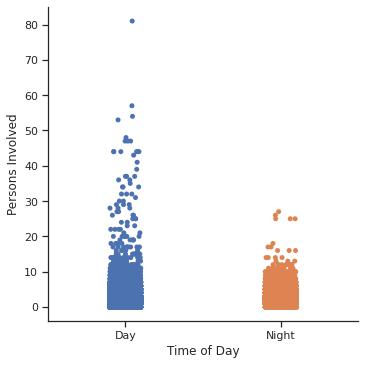

In [107]:
sns.catplot(x="Time of Day", y="Persons Involved"  ,data=unscaled_features_df)

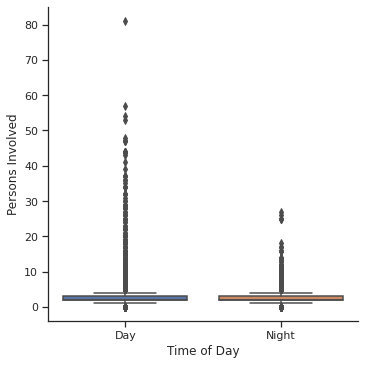

In [108]:
sns.catplot(x="Time of Day", y="Persons Involved" , data=unscaled_features_df, kind="box")

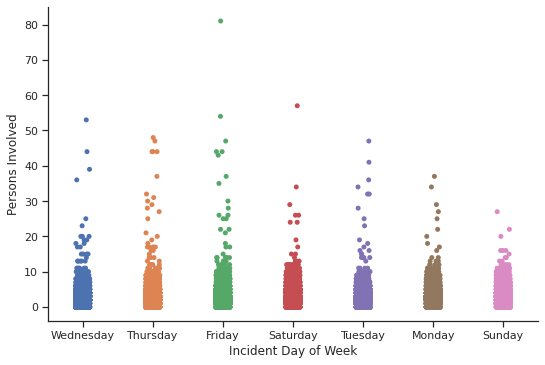

In [112]:
sns.catplot(x="Incident Day of Week", y="Persons Involved" , data=unscaled_features_df, aspect=1.5)

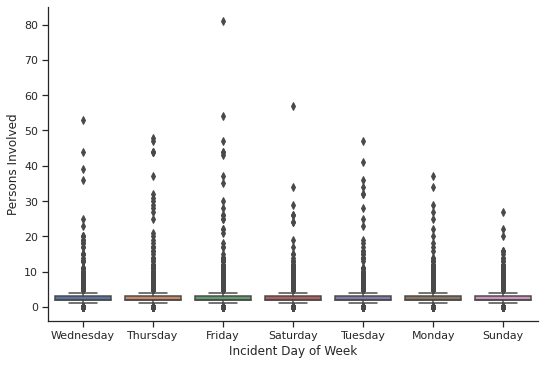

In [113]:
sns.catplot(x="Incident Day of Week", y="Persons Involved" , data=unscaled_features_df, aspect=1.5, kind='box')

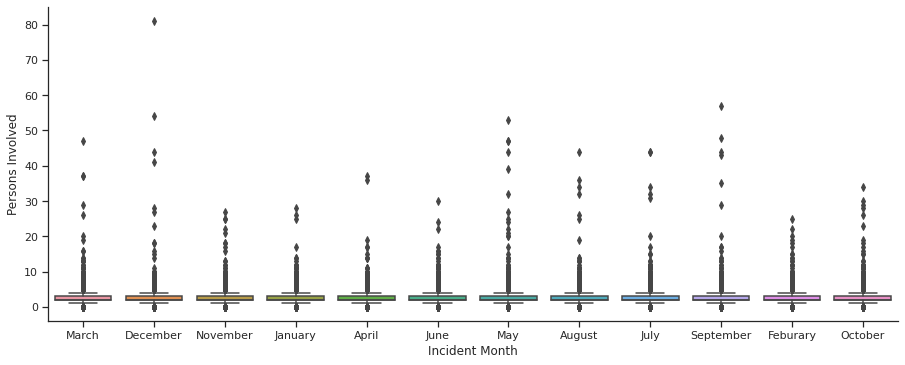

In [115]:
sns.catplot(x="Incident Month", y="Persons Involved" , data=unscaled_features_df, aspect=2.5, kind='box')

### Charting Vehicles Involved for Different Days, Months, and Times of Day

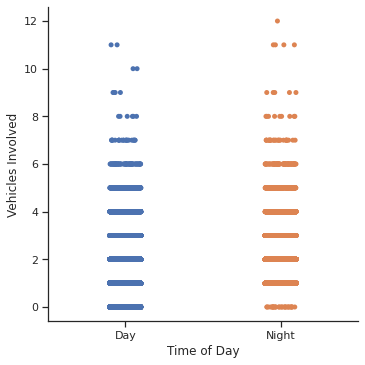

In [116]:
sns.catplot(x="Time of Day", y="Vehicles Involved"  ,data=unscaled_features_df)

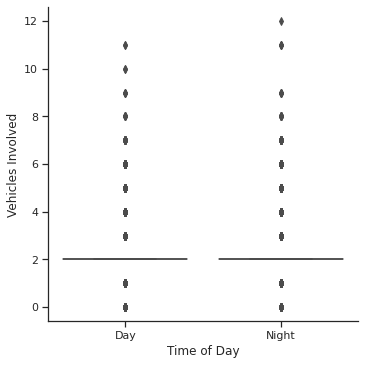

In [118]:
sns.catplot(x="Time of Day", y="Vehicles Involved"  ,data=unscaled_features_df, kind='box')

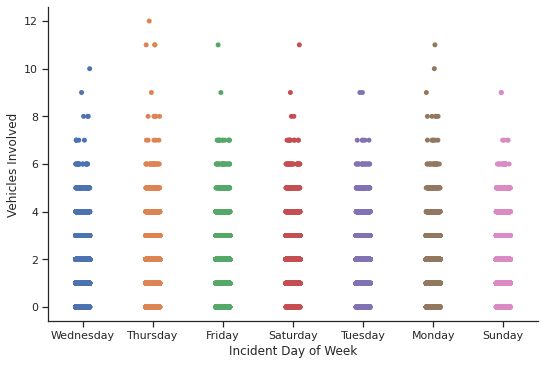

In [120]:
sns.catplot(x="Incident Day of Week", y="Vehicles Involved" , data=unscaled_features_df, aspect=1.5)

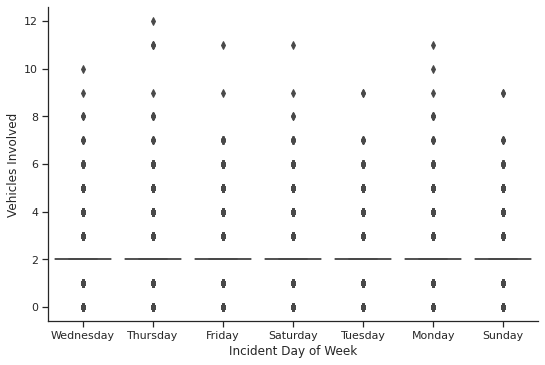

In [121]:
sns.catplot(x="Incident Day of Week", y="Vehicles Involved" , data=unscaled_features_df, aspect=1.5, kind='box')

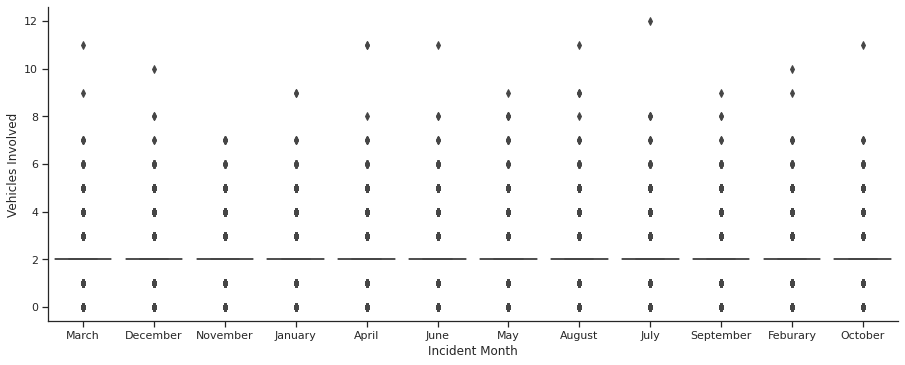

In [122]:
sns.catplot(x="Incident Month", y="Vehicles Involved" , data=unscaled_features_df, aspect=2.5, kind='box')

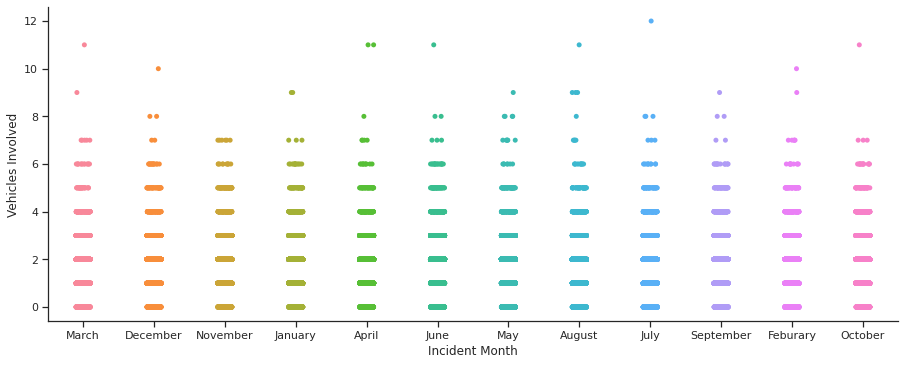

In [123]:
sns.catplot(x="Incident Month", y="Vehicles Involved" , data=unscaled_features_df, aspect=2.5)

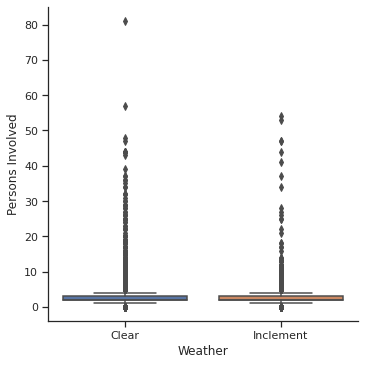

In [125]:
sns.catplot(x="Weather", y="Persons Involved"  ,data=unscaled_features_df , kind='box')